In [1]:
#@ajh 24.11.28 Can visualize choices and behaviors for each round
import numpy as np
from itertools import product
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
from collections import Counter
from functools import reduce
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import LineCollection

def coord_info_bias(subset):
    count = Counter(subset)
    most_common_element, _ = count.most_common(1)[0]
    least_common_element, _ = count.most_common()[-1]
    bias=(2-abs(most_common_element-least_common_element))*5
    return bias
def find_csv_files_with_glob(path):
    # 使用**递归展开目录，查找所有.csv文件
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    return csv_files

def vis_dim_level(round,dim=4,vis_dim=None,round_num=999,show=True):
    change_in_each_level=[]
    block_list=[None]*dim
    init=False
    for blocks_idx,blocks in enumerate(round):
        blocks_matrix=[]
        for ob in blocks:
            ob_ls = list(map(int, str(ob)))
            blocks_matrix.append((ob_ls))
        blocks_matrix_arr = np.array(blocks_matrix)

        if not init:
            for i in range(blocks_matrix_arr.shape[1]):
                block_list[i]=list(np.sort(blocks_matrix_arr[:,i]))
                init=True
        else:
            for i in range(blocks_matrix_arr.shape[1]):
                block_list[i].extend( np.sort(list(blocks_matrix_arr[:,i])))
    x_coord=np.arange(1,10)
    x_coord=x_coord.reshape(-1,3)
    if vis_dim == None:
        if show:
            fig, axs = plt.subplots(1, dim, figsize=(9*(dim), 7))  # create a row of subplots
        vis_dim_ls=np.arange(dim+1)
    else:
        if show:
            fig, axs = plt.subplots(1, len(vis_dim), figsize=(10*len(vis_dim), 8))
        vis_dim_ls=np.array(vis_dim)
    ax_idx=0
    for dim_idx, my_array in enumerate(block_list):
        if dim_idx not in (vis_dim_ls - 1):
            continue
        my_array = np.array(my_array).reshape(-1, 3)
        loc_list = []
        for i in range(1, 4):
            loc = np.where(my_array == i)
            loc_list.append(loc[0] + 1)
        loc_list = np.array(loc_list).reshape(-1, 3)

        change_in_each_level.append(loc_list.tolist())
        if show:
            axs[ax_idx].axvline(x=3.5, color='black', lw=5, linestyle=':')
            axs[ax_idx].axvline(x=6.5, color='black', lw=5, linestyle=':')
            axs[ax_idx].axhline(y=-1, color='gray')
            axs[ax_idx].axhline(y=-2, color='gray')
            axs[ax_idx].axhline(y=-3, color='gray')
            axs[ax_idx].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
            axs[ax_idx].set_xticklabels(['', 'Level1', '', '', 'Level2', '', '', 'Level3', ''], fontsize=15)
            axs[ax_idx].set_ylabel(f'Dim{dim_idx + 1}', fontsize=15)
            axs[ax_idx].set_yticklabels([ '', 'Block3', '', '','', 'Block2', '', '', '','Block1'], fontsize=15)
            for d in range(dim - 1):
                axs[ax_idx].scatter(x_coord[d, :], -np.array(loc_list)[d, :],s=300)
            ax_idx+=1
    if show:
        plt.suptitle(f'Round:{round_num+1}',fontsize=20)
        
        plt.show()
    return change_in_each_level
def draw_behavior(x,y,z,round_reward):
    norm = plt.Normalize(vmin=0, vmax=100)
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(
        segments=segments[:, :, :2],  
        cmap='jet',
        norm=norm
    )
    lc.set_array(round_reward)  
    lc.set_linewidth(2)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(segments)):
        segment = segments[i]
        color = cm.jet(norm(round_reward[i]))
        ax.plot(segment[:, 0], segment[:, 1], zs=z[i:i+2], color=color)
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='jet'), ax=ax, shrink=0.5)
    cbar.set_label('Reward')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Timestamp')
    plt.show()

def calculate_centroid(points):
    if len(points) != 4:
        raise ValueError("需要四个点来计算质心。")

    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    
    centroid_x = sum(x_coords) / 4.0
    centroid_y = sum(y_coords) / 4.0
    
    return (centroid_x, centroid_y)
def calculate_normalized_entropy(combination):
    all_combinations = list(product([1, 2, 3], repeat=3))
    def entropy(comb):
        frequency = {i: comb.count(i) for i in set(comb)}
        probabilities = [freq / len(comb) for freq in frequency.values()]
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    entropy_value = -entropy(combination)
    all_entropies = [-entropy(comb) for comb in all_combinations]
    scaler = MinMaxScaler(feature_range=(1, 10))
    normalized_entropies = scaler.fit_transform(np.array(all_entropies).reshape(-1, 1)).flatten()
    index = all_combinations.index(tuple(combination))
    return normalized_entropies[index]

['F:\\CIBR\\project\\Human Function Learning\\data\\2024.10.30\\oct3003_test3_2024-10-30_12h56.38.822.csv']


<IPython.core.display.Javascript object>


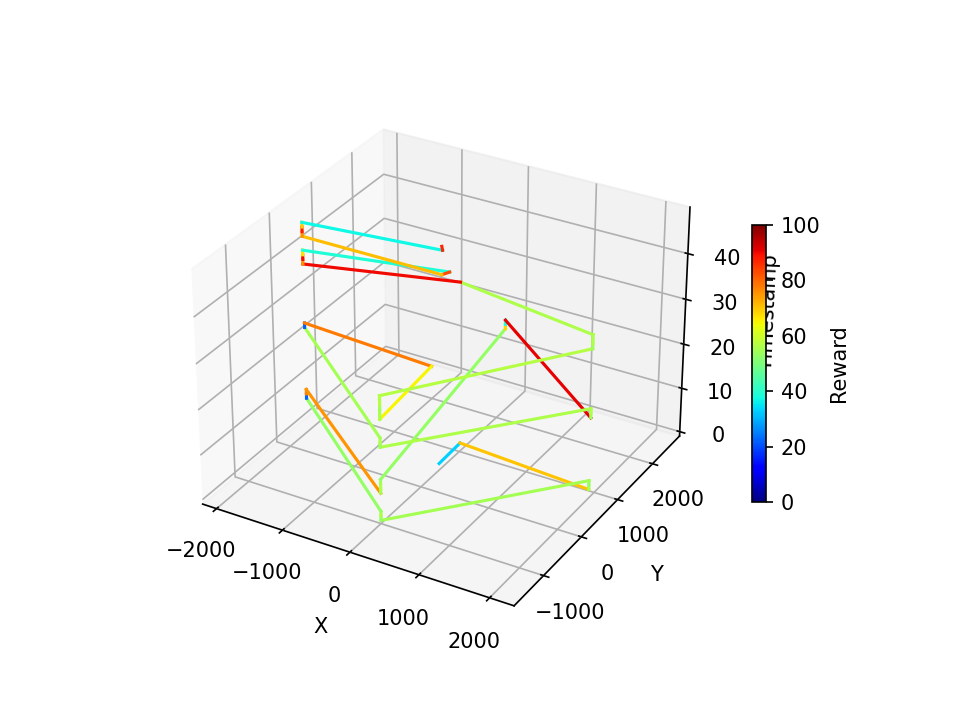

In [6]:
%matplotlib notebook
#### CHANGE THE FILE NAME
file_name='oct3003'
#### 
directory_path = 'F:\CIBR\project\Human Function Learning\data'
csv_paths = find_csv_files_with_glob(directory_path)
csv=pd.read_csv(csv_paths[1])
csv.keys()
csv_file_path=[csv for csv in csv_paths if file_name in csv]
print(csv_file_path)
csv=pd.read_csv(csv_file_path[0])
if len(csv['phase'].unique())<3:
    csv_block=csv[csv['phase']=='phase2']
else:
    csv_block=csv[ csv['phase']=='phase2']
round_behavour=[]
for i in range(len(csv_block['block1_fullChoice'])):
    B1=eval(csv_block['block1_picChoice'].iloc[i].split('odict_keys')[1])
    B1_int = list(map(int, B1))
    B2=eval(csv_block['block2_picChoice'].iloc[i].split('odict_keys')[1])
    B2_int = list(map(int, B2))
    B3=eval(csv_block['block3_picChoice'].iloc[i].split('odict_keys')[1])
    B3_int = list(map(int, B3))
    one_round=[B1_int,B2_int,B3_int]
    round_behavour.append(one_round)
    
round_behavour=np.array(round_behavour)
round_reward=[]
for r in(csv_block['reward']):
    round_reward.append(r)
    
round_reward=np.array(round_reward)
OP_change=[]
start_num=0
end_num=50
for idx,round_val in enumerate(round_behavour[start_num:end_num]):
    roundnum=idx+start_num
    round_level_change=vis_dim_level(round_val,dim=4,round_num=roundnum,show=False) 
    #### SHOW= True can visualize 4dim in each round.
    #### vis_dim=[0,3] means only show Dim0 and Dim3
    OP_change.append(round_level_change)
INFO_SCORE=[]
for idx,round_choice in enumerate(OP_change):
    ROUND_INFO_SCORE=[]
    for Dim in round_choice:
        bias=list(map(coord_info_bias, Dim))
        choice_entrpy = list(map(calculate_normalized_entropy, Dim))
        choice_entrpy_bias=np.array(choice_entrpy)+np.array(bias)
        choice_entrpy_bias_ls=list(choice_entrpy_bias)
        choice_entrpy_arr=list(choice_entrpy_bias_ls)
        level_info_score=reduce(lambda x, y: x * y, choice_entrpy_arr)
        ROUND_INFO_SCORE.append(level_info_score)
    INFO_SCORE.append(ROUND_INFO_SCORE)
X = np.array((INFO_SCORE))
value=np.mean(X,axis=1)

D_coord={}
D_coord[0]=list(zip(X[:,0],[0]*len(X)))
D_coord[1]=list(zip([0]*len(X),X[:,1]))
D_coord[2]=list(zip(-X[:,2],[0]*len(X)))
D_coord[3]=list(zip([0]*len(X),-X[:,3]))

centroid = []
for i in range(len(D_coord[0])):
    centroid.append(calculate_centroid([D_coord[0][i],D_coord[1][i],D_coord[2][i],D_coord[3][i]]))


X_scaled=np.array((centroid))
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)
# heat map in X-Y
# plt.hist2d(X_pca[:,0],X_pca[:,1])
x=X_pca[:,0]
y=X_pca[:,1]
z = np.arange(len(X))
draw_behavior(x,y,z,round_reward)
